In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('automobile-data-set-clean-df.csv',encoding='utf-8',index_col=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


<h3>Simple Linear Regression</h3>
<p>𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋</p>

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [47]:
print("Value of the intercept : {0}, value of the slope : {1}".format(lm.intercept_,lm.coef_))

Value of the intercept : 38423.305858157415, value of the slope : [-821.73337832]


<p>price = 38423.31 - 821.73 * highway-mpg</p>

<h3>Multiple Linear Regression</h3>
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [48]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [49]:
print("Value of the intercept : {0}, value of the slope : {1}".format(lm.intercept_,lm.coef_))

Value of the intercept : -15811.863767729246, value of the slope : [53.53022809  4.70805253 81.51280006 36.1593925 ]


<p>Price = -15811.863767729246 + 53.53022809 * horsepower + 4.70805253 * curb-weight + 81.51280006 * engine-size + 36.1593925 * highway-mpg</p>

<h3>Model Evaluation using Visualization</h3>

In [50]:
import seaborn as sns
%matplotlib inline 

<h4>Regression Plot</h4>
<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>. This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0, 48292.752272300626)

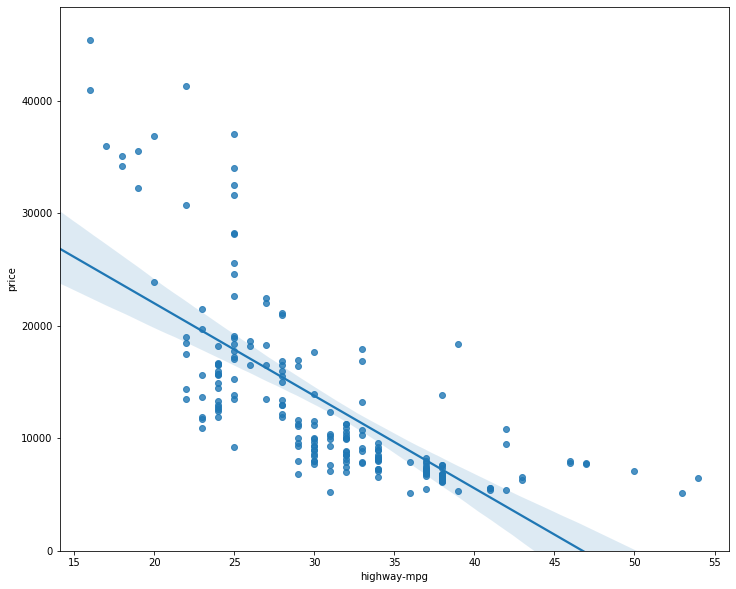

In [51]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

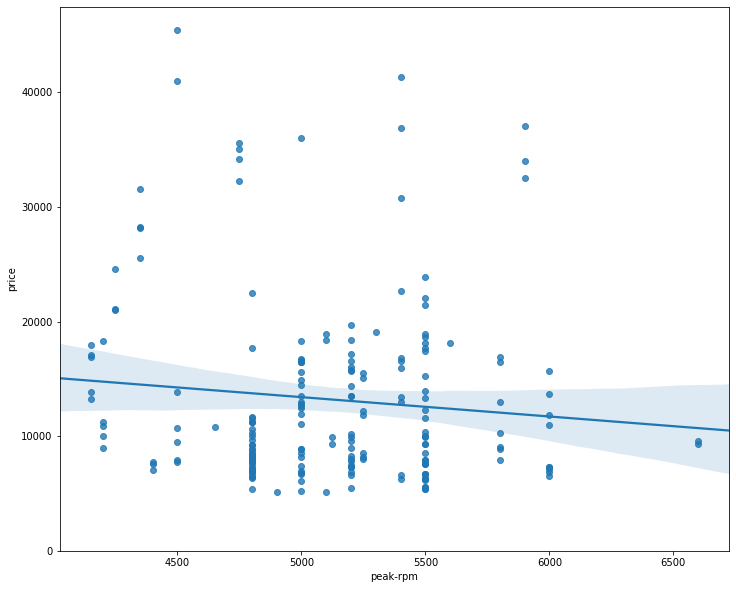

In [52]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

<h4>Residual Plot</h4>
<p>A good way to visualize the variance of the data is to use a <b>residual plot</b>. If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

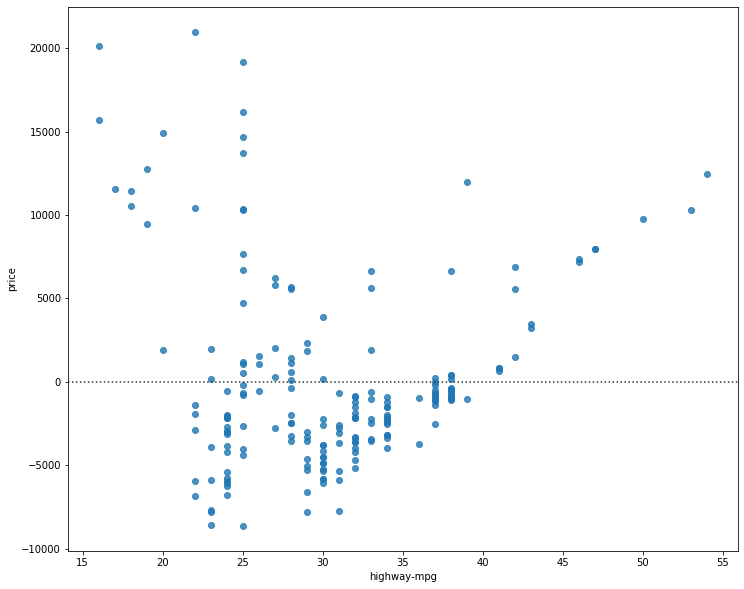

In [53]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h4>Distribution Plot</h4>
<p><b>Distribution Plot</b> can be used to visualize a model for Multiple Linear Regression. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

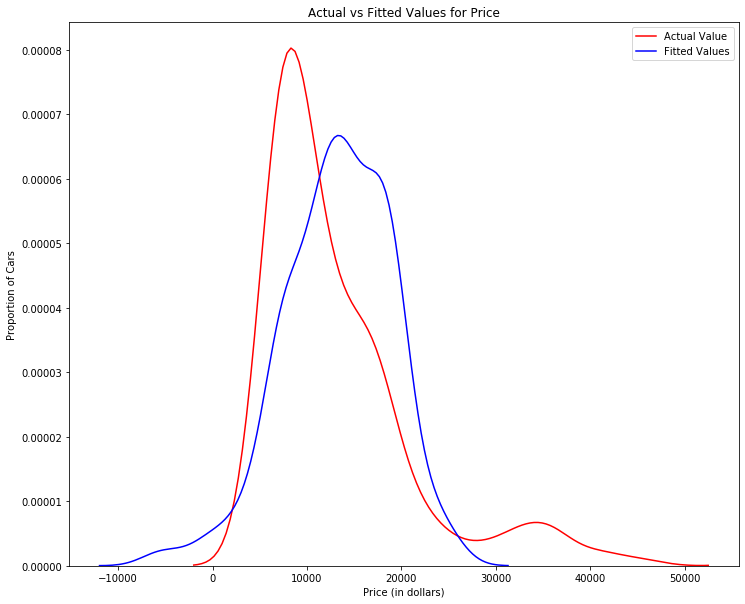

In [54]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h3>Simple Polynomial regression</h3>
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2\\
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [55]:
# fit the polynomial using the function polyfit
# use function poly1d to display the polynomial function
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [56]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

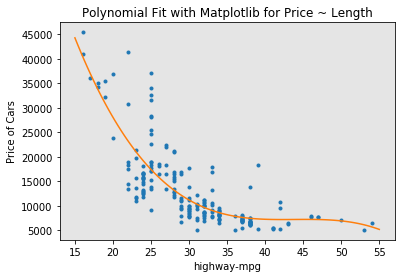

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

<h3>Multivariate Polynomial Regression</h3>
<p>Example : Second-order polynomial with two variables</p>
$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [58]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

In [59]:
# original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [60]:
# after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

<h3>Measures for In-Sample Evaluation</h3>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.<b> The model with the higher R-squared value is a better fit.</b></p>


<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).<b> The model with the smallest MSE value is a better fit.</b></p>

<h4>Model 1: Simple Linear Regression</h4>

In [62]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
Yhat=lm.predict(X)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.4965911884339176
The mean square error of price and predicted value is:  31635042.944639888


<p>We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".</p>

<h4>Model 2: Multiple Linear Regression</h4>

In [63]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multi fit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.8093732522175299
The mean square error of price and predicted value using multi fit is:  11979300.349818882


<p>We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".</p>

<h4>Model 3: Polynomial Fit</h4>

In [64]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print('The mean square error of price and predicted value using polynomial fit is: ', \
      mean_squared_error(df['price'], p(x)))

The R-square value is:  0.674194666390652
The mean square error of price and predicted value using polynomial fit is:  20474146.426361218


<h4>Conclusion:</h4>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>
<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>

<h3>Prediction</h3>

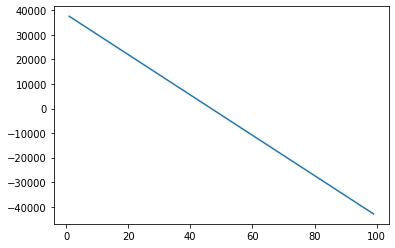

In [65]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
yhat=lm.predict(new_input)
plt.plot(new_input, yhat)
plt.show()